In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [1]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.express as px
import plotly.graph_objs as go

In [21]:
cluster_3a = np.genfromtxt('cluster3a.csv', dtype = float, delimiter=',')
cluster_3b = np.genfromtxt('cluster3b.csv', dtype = float, delimiter=',')
cluster_4a = np.genfromtxt('cluster4a.csv', dtype = float, delimiter=',')
cluster_4b = np.genfromtxt('cluster4b.csv', dtype = float, delimiter=',')
cluster_5a = np.genfromtxt('cluster5a.csv', dtype = float, delimiter=',')
cluster_6a = np.genfromtxt('cluster6a.csv', dtype = float, delimiter=',')
cluster_7a = np.genfromtxt('cluster7a.csv', dtype = float, delimiter=',')
cluster_7b = np.genfromtxt('cluster7b.csv', dtype = float, delimiter=',')
cluster_7c = np.genfromtxt('cluster7c.csv', dtype = float, delimiter=',')
cluster_7d = np.genfromtxt('cluster7d.csv', dtype = float, delimiter=',')
cluster_7e = np.genfromtxt('cluster7e.csv', dtype = float, delimiter=',')
cluster_8a = np.genfromtxt('cluster8a.csv', dtype = float, delimiter=',')
cluster_8b = np.genfromtxt('cluster8b.csv', dtype = float, delimiter=',')
cluster_9a = np.genfromtxt('cluster9a.csv', dtype = float, delimiter=',')
cluster_9b = np.genfromtxt('cluster9b.csv', dtype = float, delimiter=',')
cluster_10a = np.genfromtxt('cluster10a.csv', dtype = float, delimiter=',')

In [65]:
def plot_points(points, cluster_name=' '):
  fig = plt.figure(figsize=(8,5))
  ax = fig.add_subplot()
  scatter = ax.scatter(points[:, 1], points[:, 0], c = points[:, 2], cmap = 'viridis')
  plt.colorbar(scatter, label='Depth [ft]')
  ax.set_xlabel("Easting [ft]")
  ax.set_ylabel("Northing [ft]")
  plt.title(cluster_name + ' Before Noise Removal')
  plt.grid()
  plt.show()

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(projection='3d')
  scatter = ax.scatter(points[:, 1], points[:, 0], points[:, 2], c = points[:, 2], cmap = 'viridis')
  plt.colorbar(scatter, label='Depth [ft]')
  ax.set_xlabel("Easting [ft]")
  ax.set_ylabel("Northing [ft]")
  ax.set_zlabel("Depth [ft]")
  ax.zaxis.labelpad=-0.7
  plt.title(cluster_name + ' Before Noise Removal')
  plt.show()

def plot_NE_NoNoise(points, Emin, Emax, Nmin, Nmax, cluster_name=' '):
  points2 = points[(points[:,1] < Emax) & (points[:,1] > Emin) & (points[:,0] < Nmax) & (points[:,0] > Nmin)]
  fig = plt.figure(figsize=(8,5))
  ax = fig.add_subplot()
  scatter = ax.scatter(points2[:, 1], points2[:, 0], c = points2[:, 2], cmap = 'viridis')
  plt.colorbar(scatter, label='Depth [ft]')
  ax.set_xlabel("Easting [ft]")
  ax.set_ylabel("Northing [ft]")
  plt.title(cluster_name + ' After Noise Removal')
  plt.grid()
  plt.show()

  xs = points2[:,1]
  ys = points2[:,0]
  zs = points2[:,2]

  # plot raw data
  plt.figure()
  ax = plt.subplot(111, projection='3d')
  scatter = ax.scatter(xs, ys, zs, c = zs, cmap = 'viridis')
  plt.colorbar(scatter, label='Depth [ft]')
  # ax.scatter(xs, ys, zs, color='b')

  # do fit
  tmp_A = []
  tmp_b = []
  for i in range(len(xs)):
      tmp_A.append([xs[i], ys[i], 1])
      tmp_b.append(zs[i])
  b = np.array(tmp_b).T
  A = np.array(tmp_A)

  # Manual solution
  fit = np.linalg.inv(A.T @ A) @ A.T @ b
  errors = b - A @ fit
  residual = np.linalg.norm(errors) / np.linalg.norm(b)

  print("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
  print("relative error:", residual)

  # plot plane
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  X,Y = np.meshgrid(np.arange(xlim[0], xlim[1], 100),
                    np.arange(ylim[0], ylim[1], 100))
  Z = np.zeros(X.shape)
  for r in range(X.shape[0]):
      for c in range(X.shape[1]):
          Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
  ax.plot_wireframe(X,Y,Z, color='k')

  ax.set_xlabel('Easting [ft]')
  ax.set_ylabel('Northing [ft]')
  ax.set_zlabel('Depth [ft]')
  plt.title(cluster_name + ' Plane Fitting with Least Squares \n relative error: ' + str(np.round(residual, 4)))
  plt.show()
  return points2

In [93]:
def plane_fitting(points, cluster_name=' '):
  xs = points[:,1]
  ys = points[:,0]
  zs = points[:,2]

  # plot raw data
  plt.figure()
  ax = plt.subplot(111, projection='3d')
  scatter = ax.scatter(xs, ys, zs, c = zs, cmap = 'viridis')
  plt.colorbar(scatter, label='Depth [ft]')
  # ax.scatter(xs, ys, zs, color='b')

  # do fit
  tmp_A = []
  tmp_b = []
  for i in range(len(xs)):
      tmp_A.append([xs[i], ys[i], 1])
      tmp_b.append(zs[i])
  b = np.array(tmp_b).T
  A = np.array(tmp_A)

  # Manual solution
  fit = np.linalg.inv(A.T @ A) @ A.T @ b
  errors = b - A @ fit
  residual = np.linalg.norm(errors) / np.linalg.norm(b)

  print("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
  print("relative error:", residual)

  # plot plane
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  X,Y = np.meshgrid(np.arange(xlim[0], xlim[1], 100),
                    np.arange(ylim[0], ylim[1], 100))
  Z = np.zeros(X.shape)
  for r in range(X.shape[0]):
      for c in range(X.shape[1]):
          Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
  ax.plot_wireframe(X,Y,Z, color='k')

  ax.set_xlabel('Easting [ft]')
  ax.set_ylabel('Northing [ft]')
  ax.set_zlabel('Depth [ft]')
  plt.title(cluster_name + ' Plane Fitting with Least Squares \n relative error: ' + str(np.round(residual, 4)))
  plt.show()

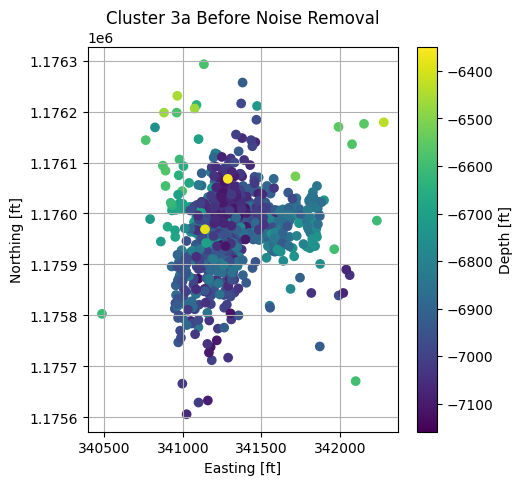

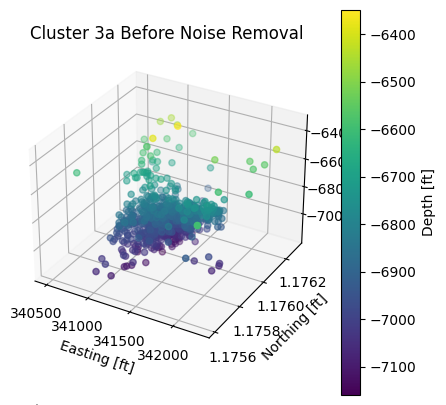

In [12]:
plot_points(cluster_3a, cluster_name='Cluster 3a')

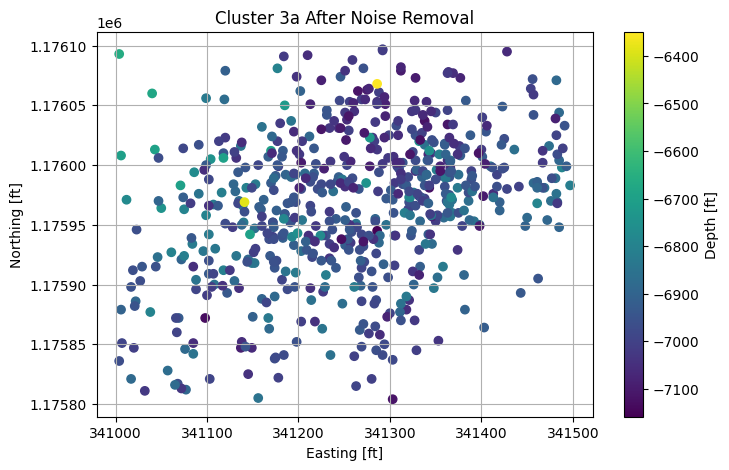

solution: -0.109699 x + -0.085871 y + 131465.485405 = z
relative error: 0.013295397334458963


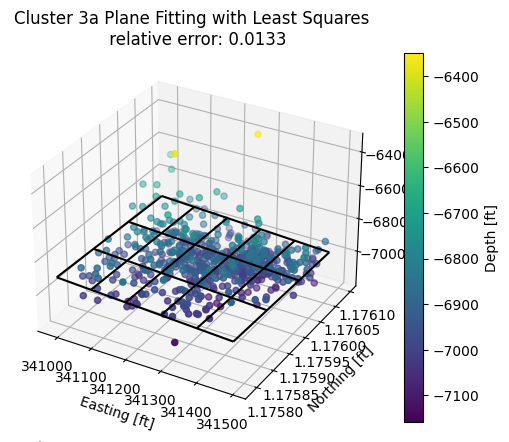

In [67]:
refined_3a = plot_NE_NoNoise(cluster_3a, Emin=341000, Emax=341500, Nmin=1.1758e6, Nmax=1.1761e6, cluster_name='Cluster 3a')

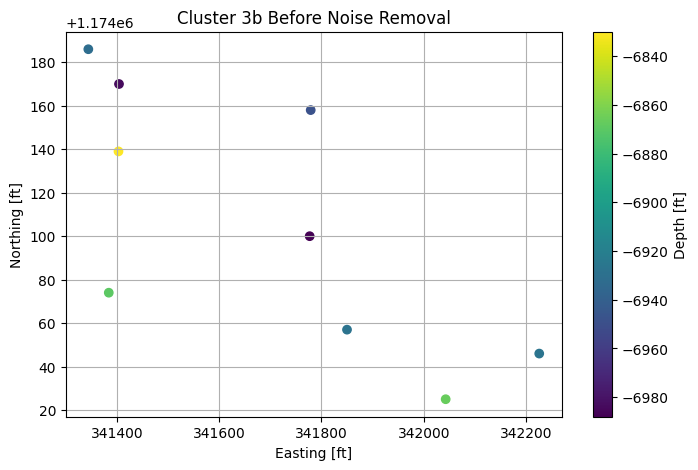

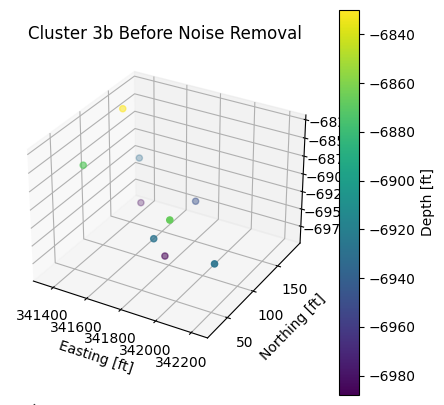

In [70]:
plot_points(cluster_3b, cluster_name='Cluster 3b')

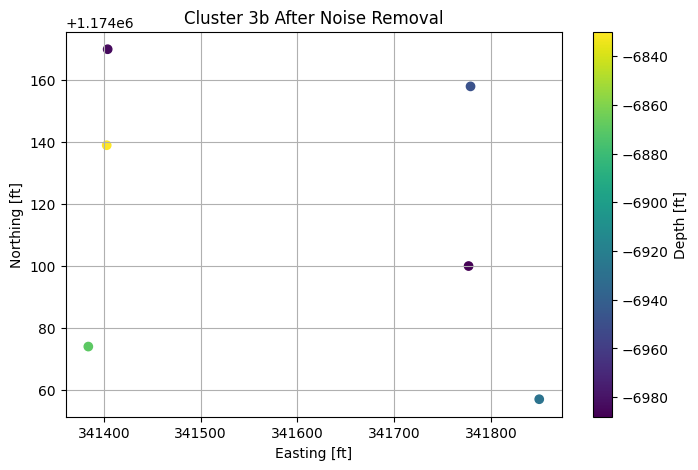

solution: -0.176028 x + -0.553515 y + 703097.122761 = z
relative error: 0.006499903676247793


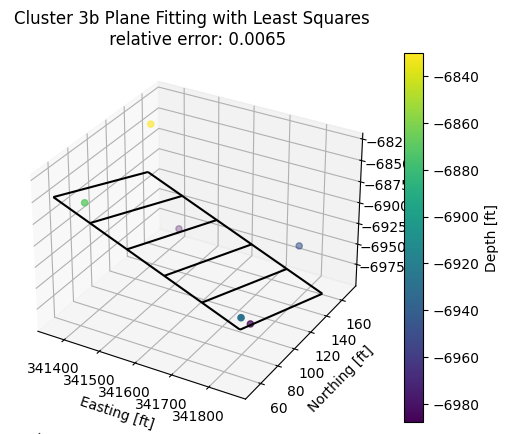

In [71]:
refined_3b = plot_NE_NoNoise(cluster_3b, Emin=cluster_3b[:, 1].min(), Emax=cluster_3b[:, 1].max(), Nmin=cluster_3b[:, 0].min(), Nmax=cluster_3b[:, 0].max(), cluster_name='Cluster 3b')

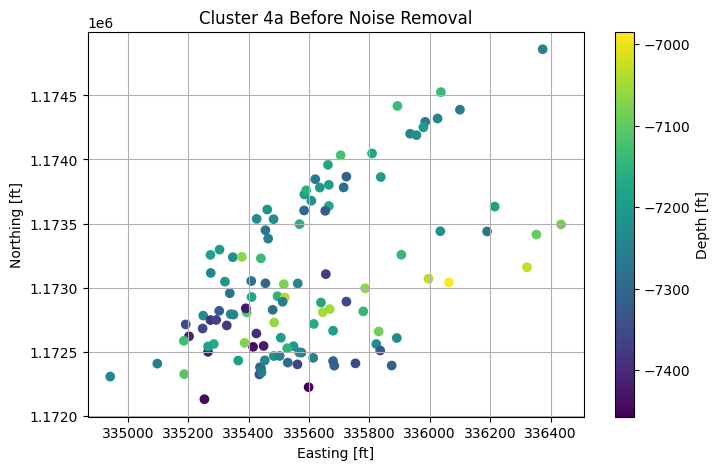

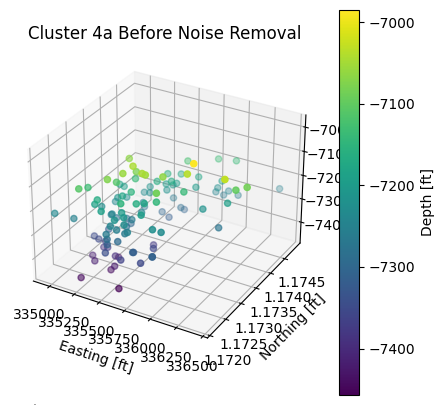

In [36]:
plot_points(cluster_4a, cluster_name='Cluster 4a')

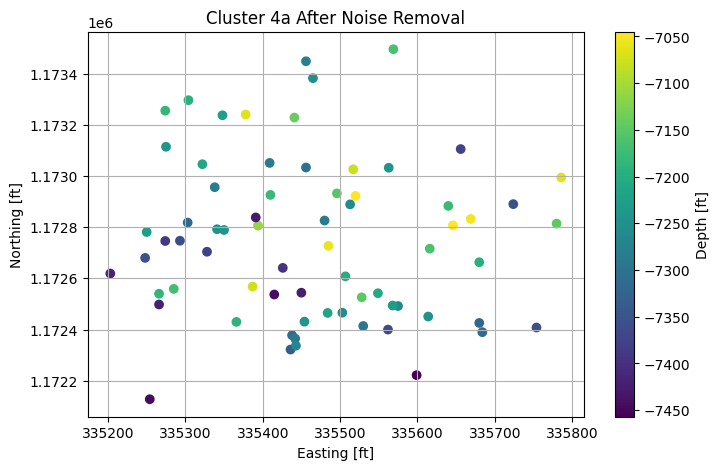

solution: 0.194929 x + 0.136024 y + -232163.775561 = z
relative error: 0.013358271690993191


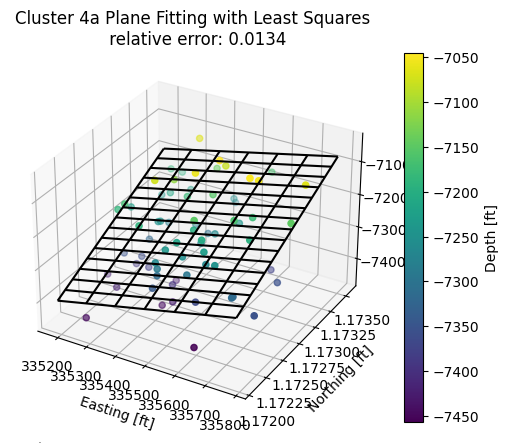

In [74]:
refined_4a = plot_NE_NoNoise(cluster_4a, Emin=335200, Emax=335800, Nmin=1.1720e6, Nmax=1.1735e6, cluster_name='Cluster 4a')

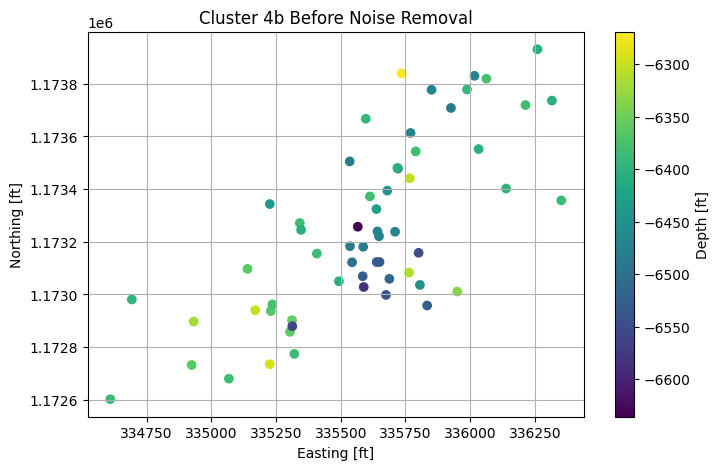

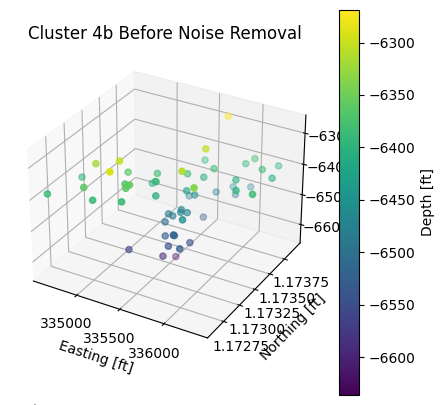

In [42]:
plot_points(cluster_4b, cluster_name='Cluster 4b')

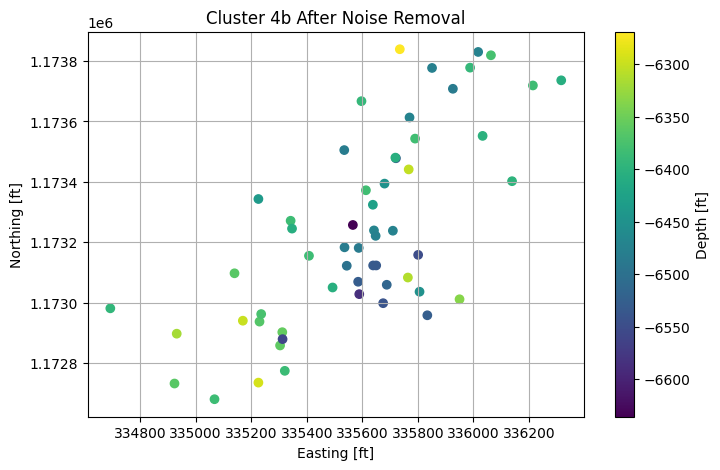

solution: -0.094115 x + 0.063708 y + -49590.864784 = z
relative error: 0.012056523450105857


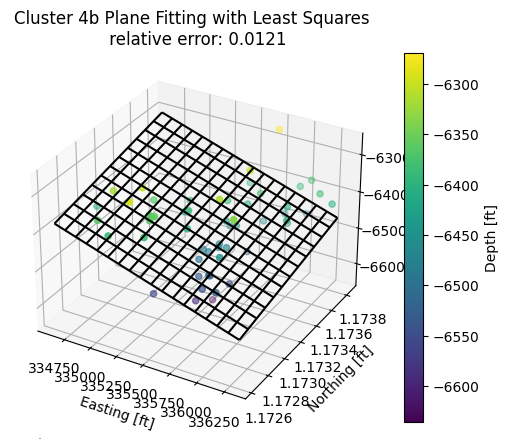

In [75]:
refined_4b = plot_NE_NoNoise(cluster_4b, Emin=cluster_4b[:, 1].min(), Emax=cluster_4b[:, 1].max(), Nmin=cluster_4b[:, 0].min(), Nmax=cluster_4b[:, 0].max(), cluster_name='Cluster 4b')

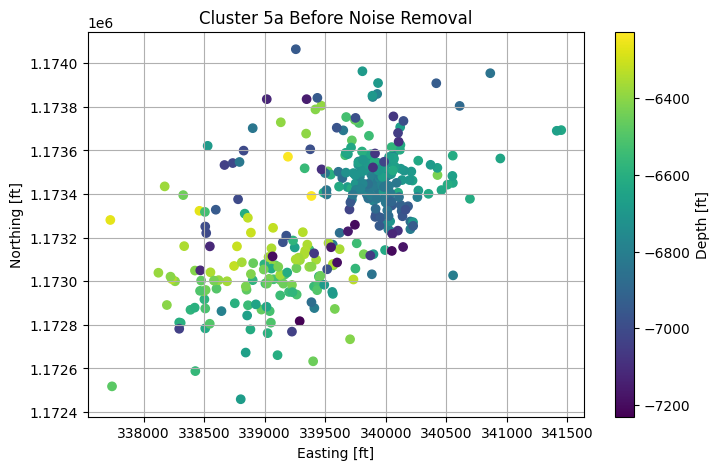

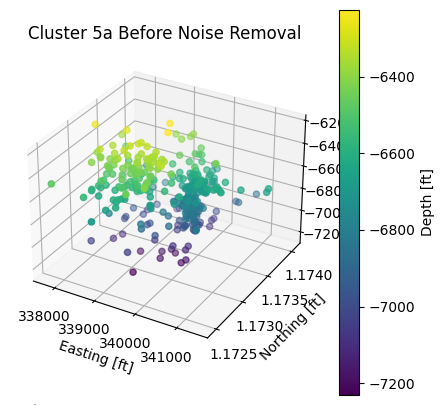

In [44]:
plot_points(cluster_5a, cluster_name='Cluster 5a')

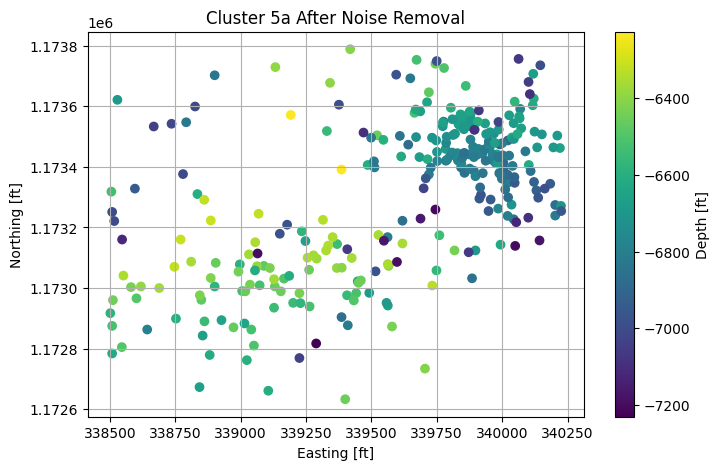

solution: -0.157436 x + -0.086239 y + 147946.609928 = z
relative error: 0.029458543407904998


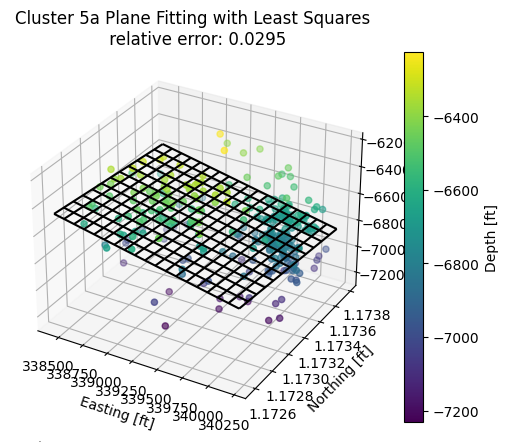

In [77]:
refined_5a = plot_NE_NoNoise(cluster_5a, Emin=338500, Emax=340250, Nmin=1.1726e6, Nmax=1.1738e6, cluster_name='Cluster 5a')

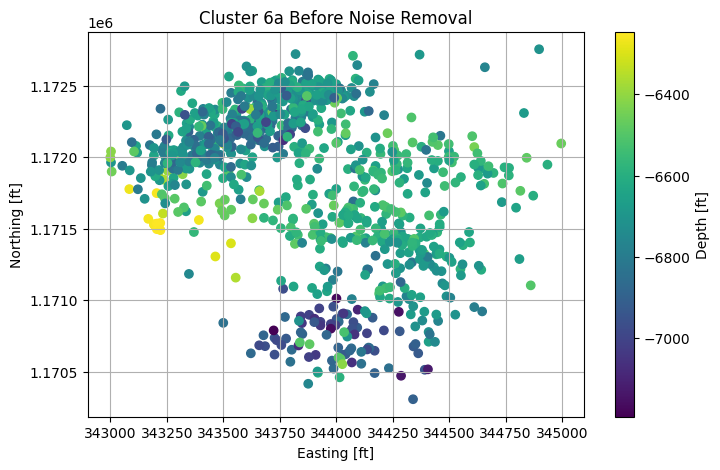

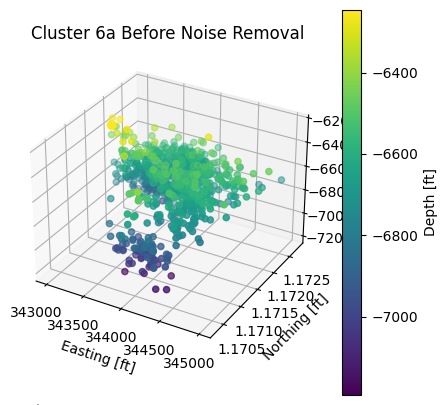

In [46]:
plot_points(cluster_6a, cluster_name='Cluster 6a')

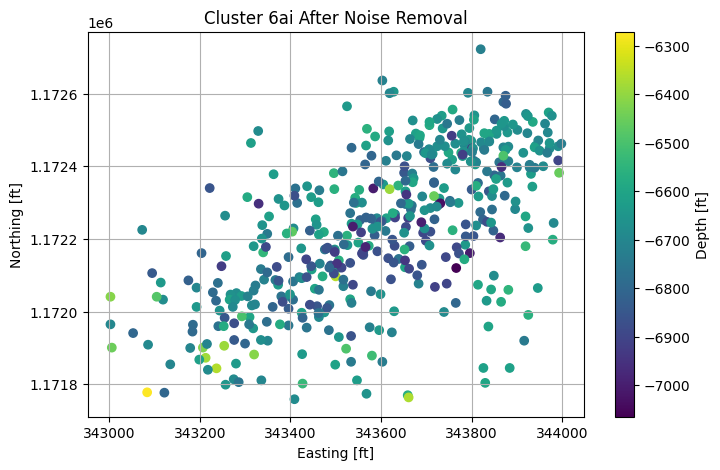

solution: -0.014199 x + -0.009701 y + 9541.608148 = z
relative error: 0.018007364089185608


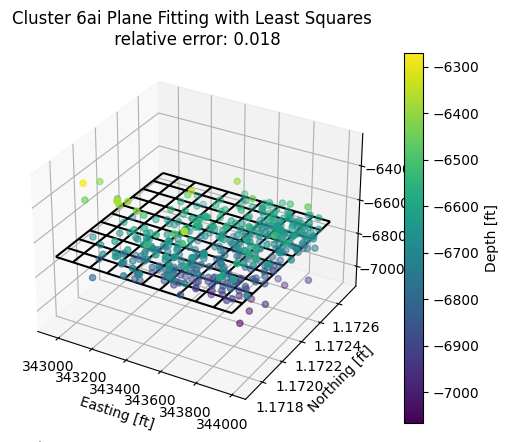

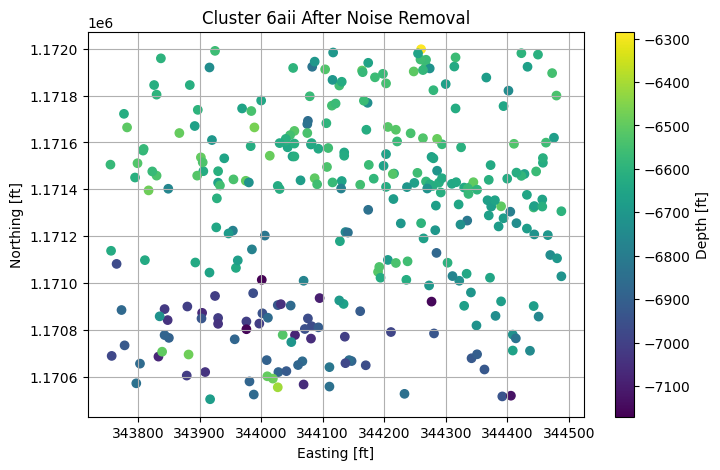

solution: 0.066489 x + 0.247107 y + -319014.534184 = z
relative error: 0.01827308236203201


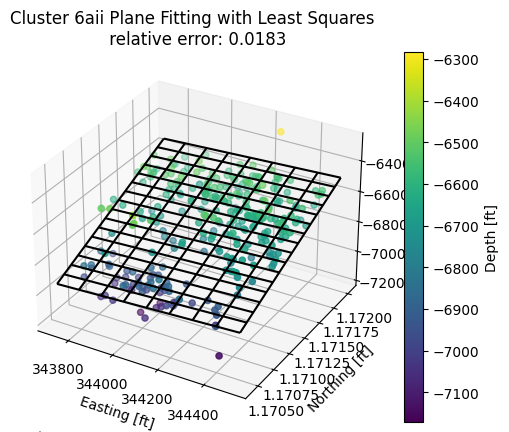

In [78]:
refined_6ai = plot_NE_NoNoise(cluster_6a, Emin=343000, Emax=344000, Nmin=1.17175e6, Nmax=1.1728e6, cluster_name='Cluster 6ai')
refined_6aii = plot_NE_NoNoise(cluster_6a, Emin=343750, Emax=344500, Nmin=1.1705e6, Nmax=1.1720e6, cluster_name='Cluster 6aii')

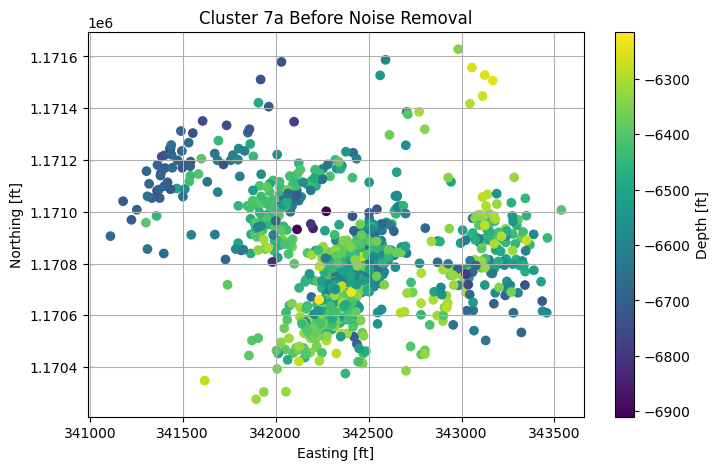

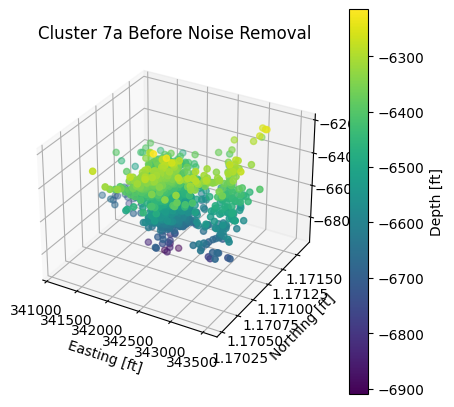

In [48]:
plot_points(cluster_7a, cluster_name='Cluster 7a')

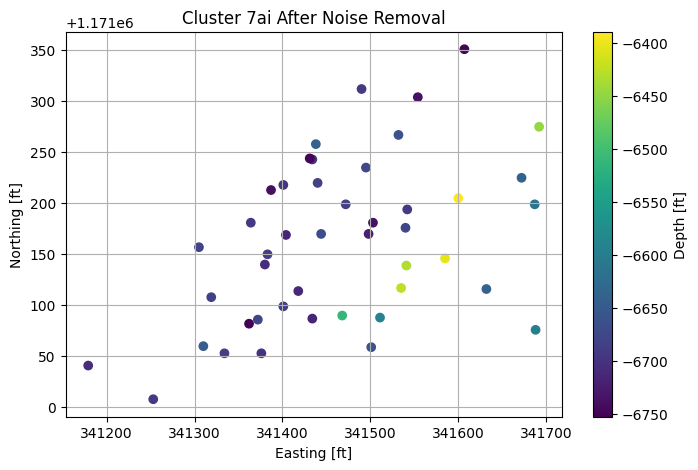

solution: 0.513504 x + -0.427147 y + 318261.856519 = z
relative error: 0.011645290327346824


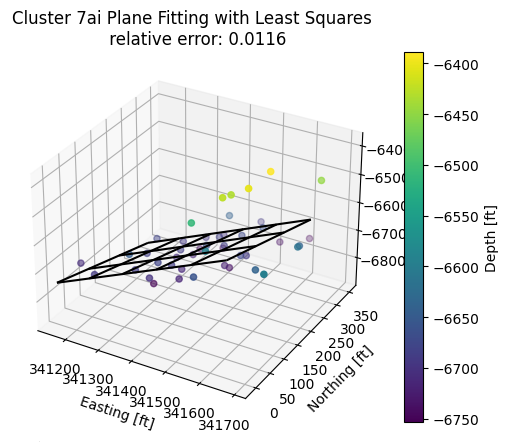

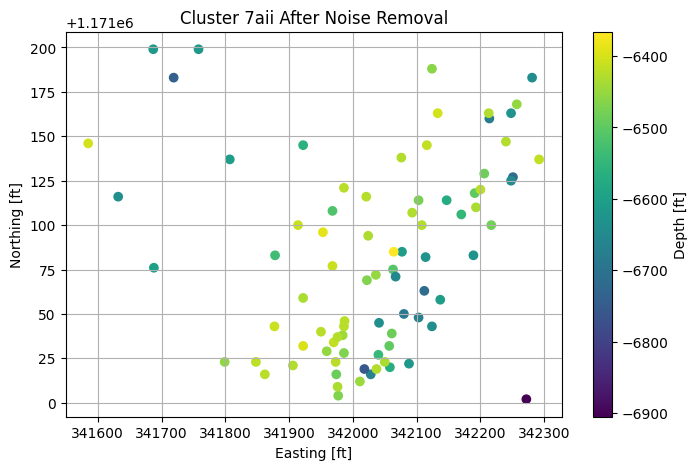

solution: -0.095837 x + -0.088285 y + 129653.561060 = z
relative error: 0.01670190864716832


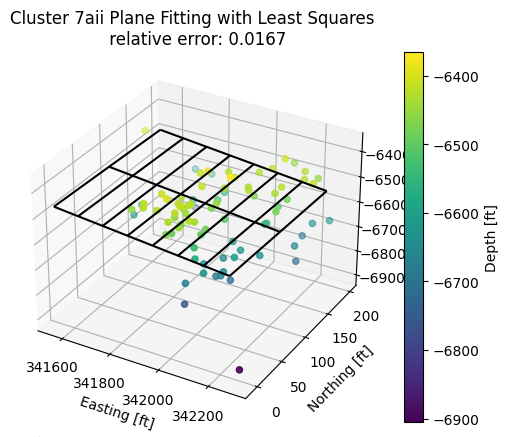

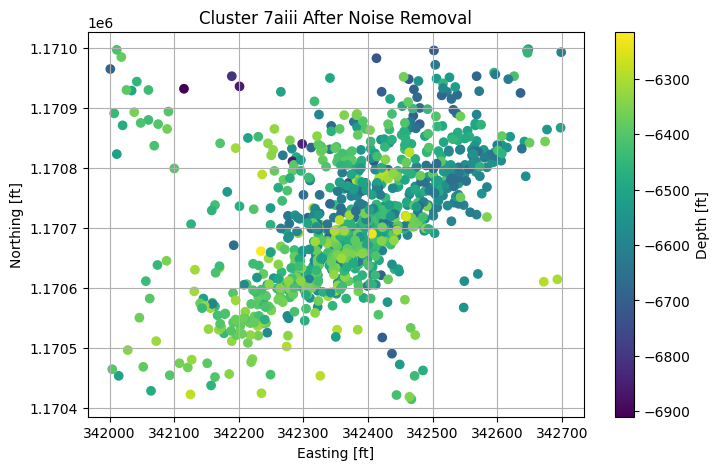

solution: -0.203526 x + -0.208536 y + 307329.966316 = z
relative error: 0.015324040220659522


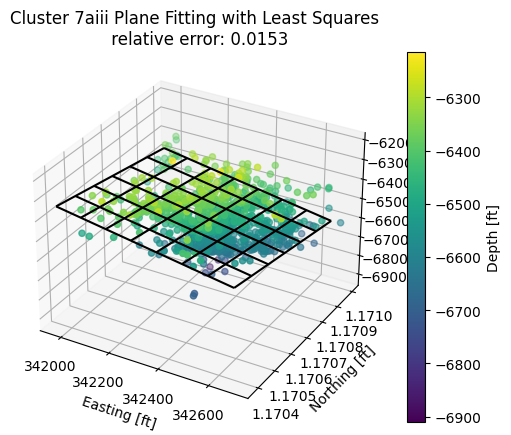

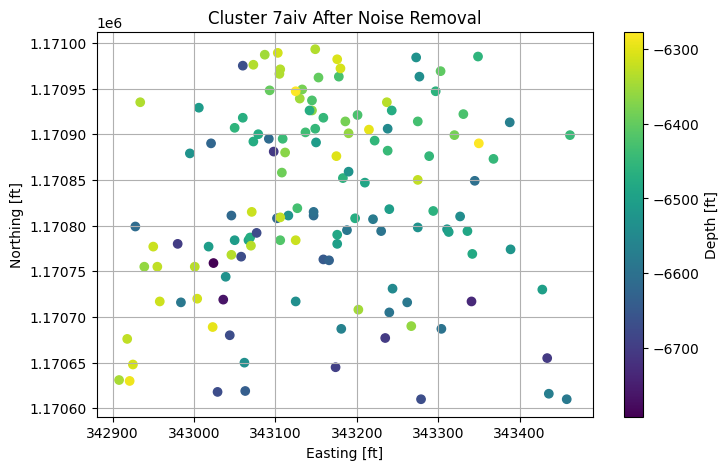

solution: -0.190126 x + 0.455641 y + -474710.314949 = z
relative error: 0.01742147846851431


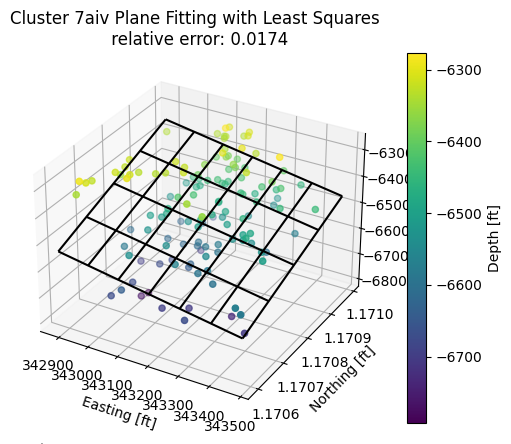

In [79]:
refined_7ai = plot_NE_NoNoise(cluster_7a, Emin=341000, Emax=341700, Nmin=1.1710e6, Nmax=1.1714e6, cluster_name='Cluster 7ai')
refined_7aii = plot_NE_NoNoise(cluster_7a, Emin=341570, Emax=342300, Nmin=1.1710e6, Nmax=1.1712e6, cluster_name='Cluster 7aii')
refined_7aiii = plot_NE_NoNoise(cluster_7a, Emin=342000, Emax=342700, Nmin=1.1704e6, Nmax=1.1710e6, cluster_name='Cluster 7aiii')
refined_7aiv = plot_NE_NoNoise(cluster_7a, Emin=342900, Emax=343500, Nmin=1.1706e6, Nmax=1.1710e6, cluster_name='Cluster 7aiv')

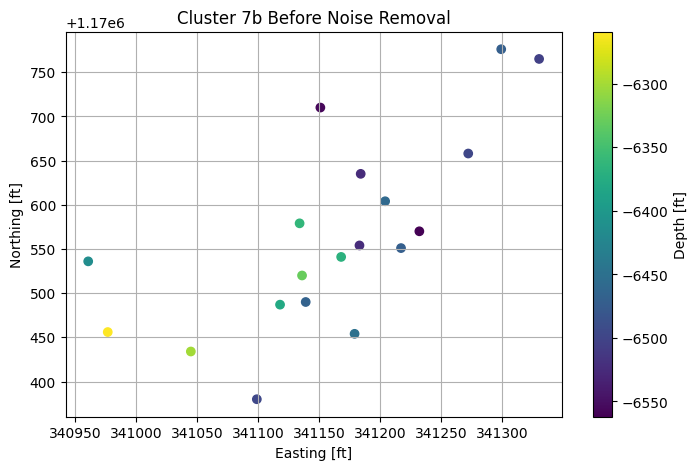

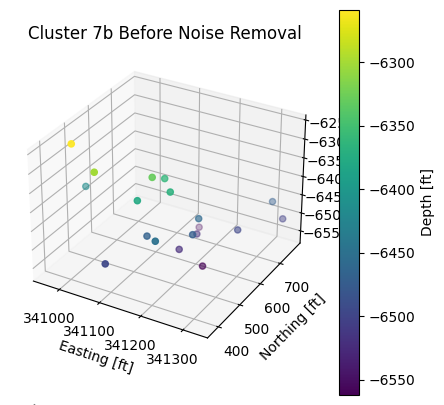

In [88]:
plot_points(cluster_7b, cluster_name='Cluster 7b')

solution: -0.484501 x + -0.095627 y + 270787.347817 = z
relative error: 0.01028855341913667


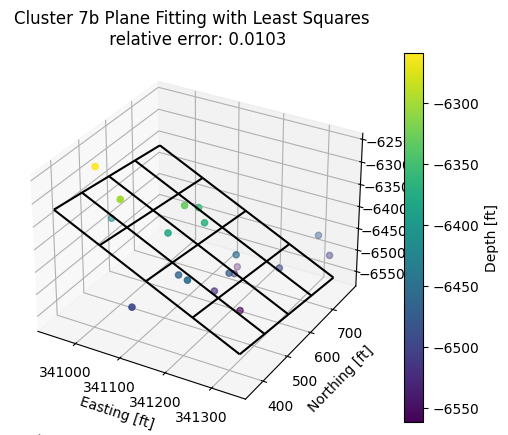

In [99]:
plane_fitting(cluster_7b, cluster_name='Cluster 7b')

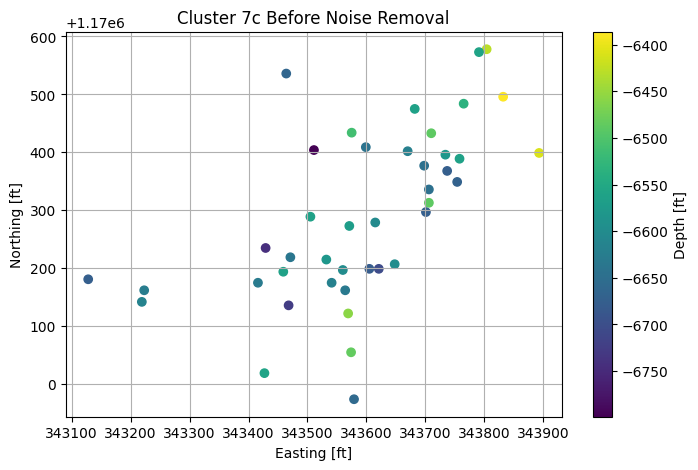

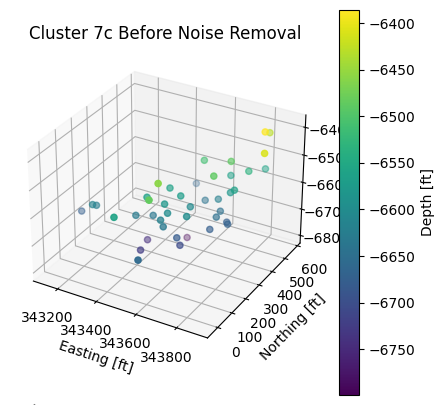

In [89]:
plot_points(cluster_7c, cluster_name='Cluster 7c')

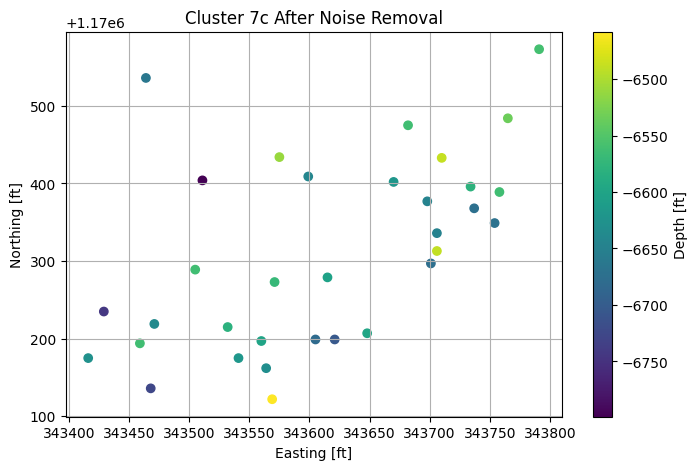

solution: 0.216379 x + -0.018062 y + -59824.412054 = z
relative error: 0.010805987988596139


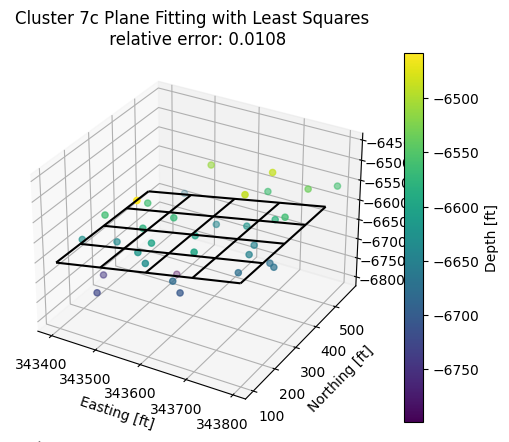

In [95]:
refined_7c = plot_NE_NoNoise(cluster_7c, Emin=343400, Emax=343800, Nmin=100+1.170e6, Nmax=600+1.17e6, cluster_name='Cluster 7c')

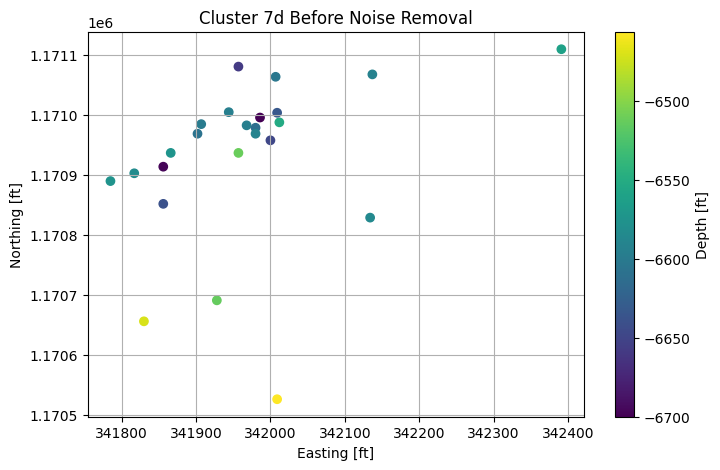

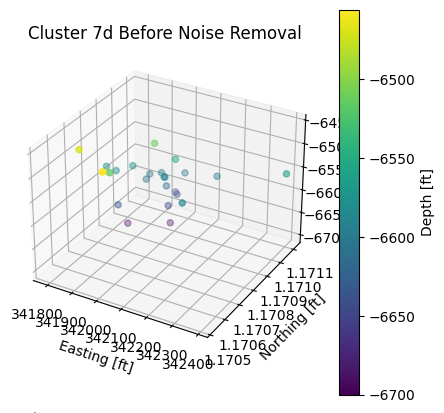

In [90]:
plot_points(cluster_7d, cluster_name='Cluster 7d')

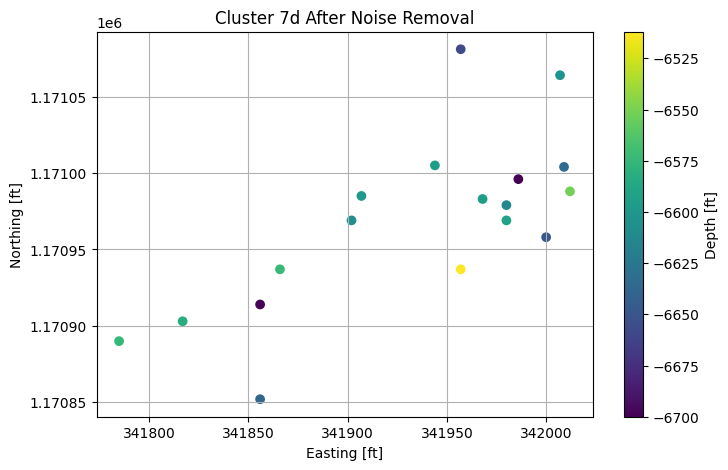

solution: 0.050019 x + -0.157490 y + 160703.015728 = z
relative error: 0.006892834936851921


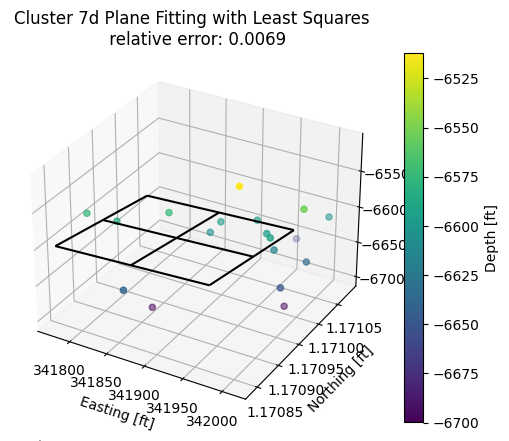

In [96]:
refined_7d = plot_NE_NoNoise(cluster_7d, Emin=341700, Emax=342050, Nmin=1.1708e6, Nmax=1.1711e6, cluster_name='Cluster 7d')

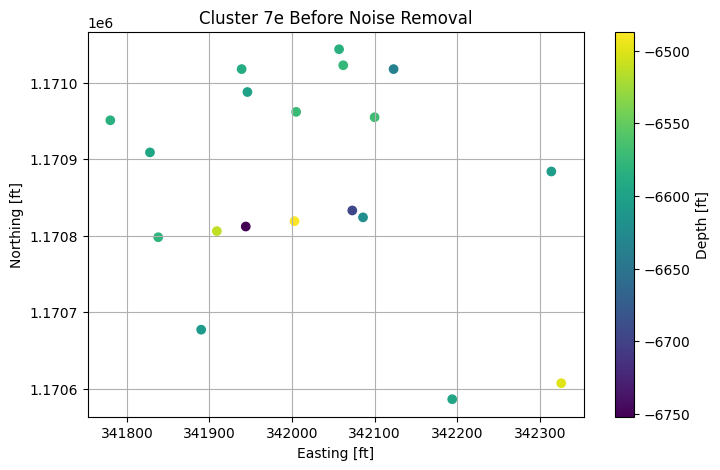

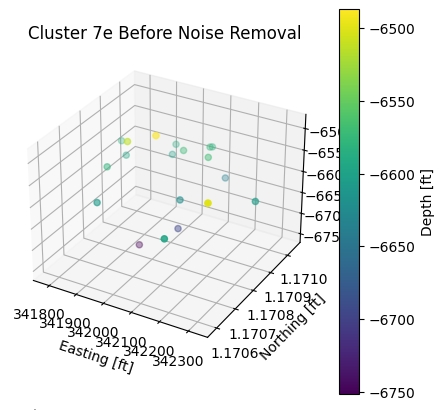

In [92]:
plot_points(cluster_7e, cluster_name='Cluster 7e')

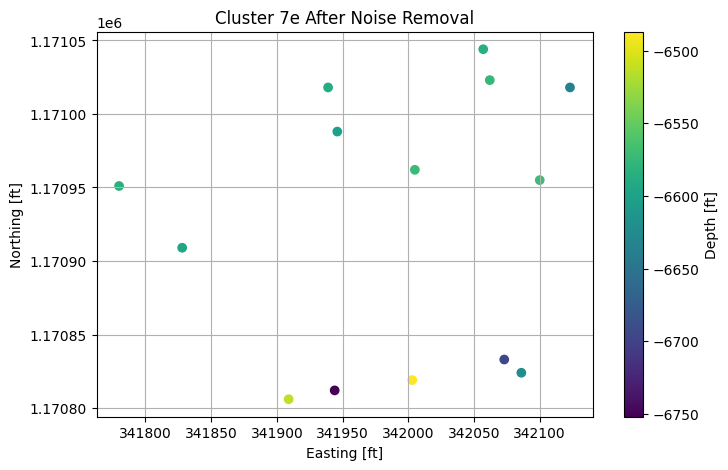

solution: -0.097307 x + 0.109380 y + -101396.110547 = z
relative error: 0.00953397320887202


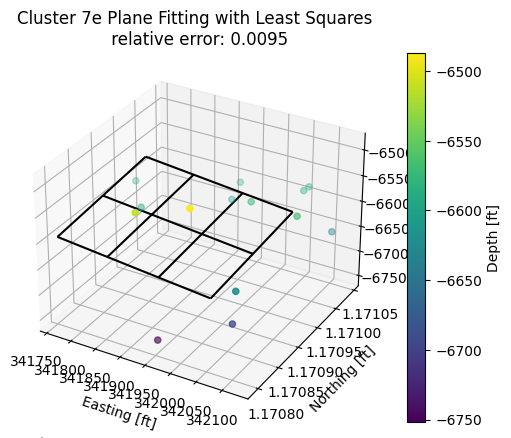

In [97]:
refined_7e = plot_NE_NoNoise(cluster_7e, Emin=341700, Emax=342150, Nmin=1.1708e6, Nmax=1.1711e6, cluster_name='Cluster 7e')

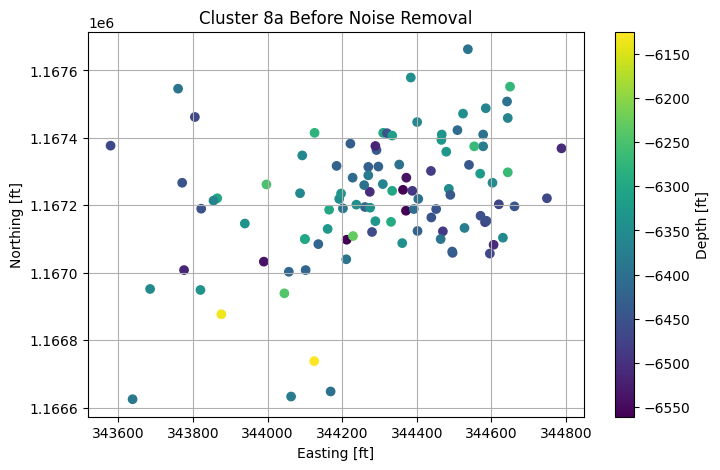

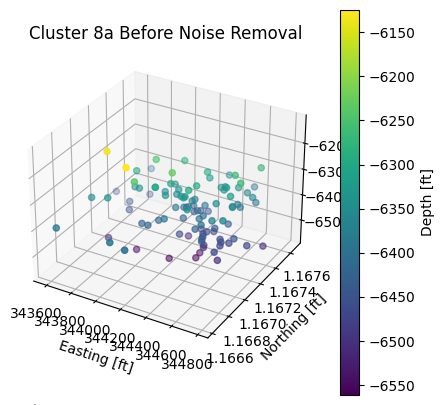

In [50]:
plot_points(cluster_8a, cluster_name='Cluster 8a')

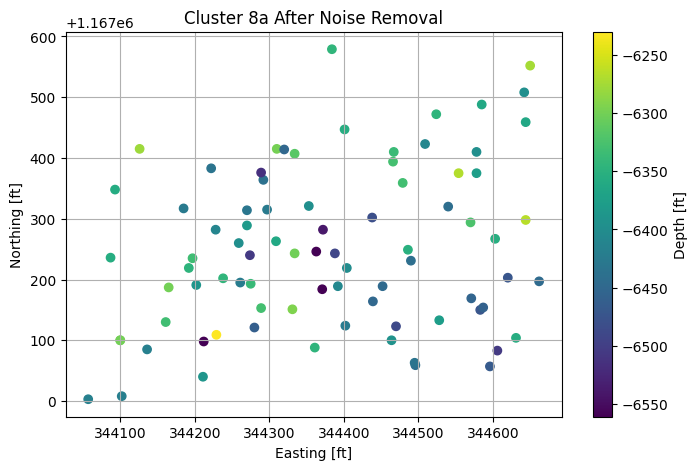

solution: -0.076770 x + 0.154909 y + -160774.025137 = z
relative error: 0.010887686081358086


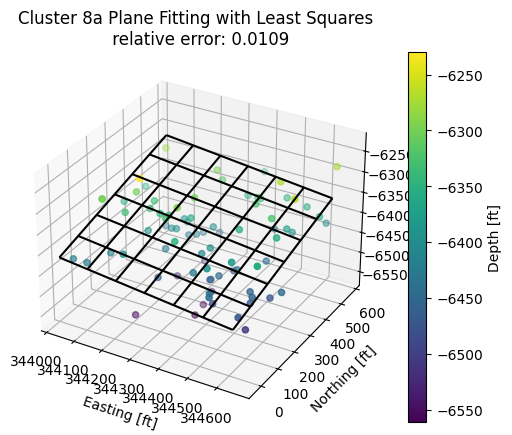

In [80]:
refined_8a = plot_NE_NoNoise(cluster_8a, Emin=344000, Emax=344700, Nmin=1.1670e6, Nmax=1.1676e6, cluster_name='Cluster 8a')

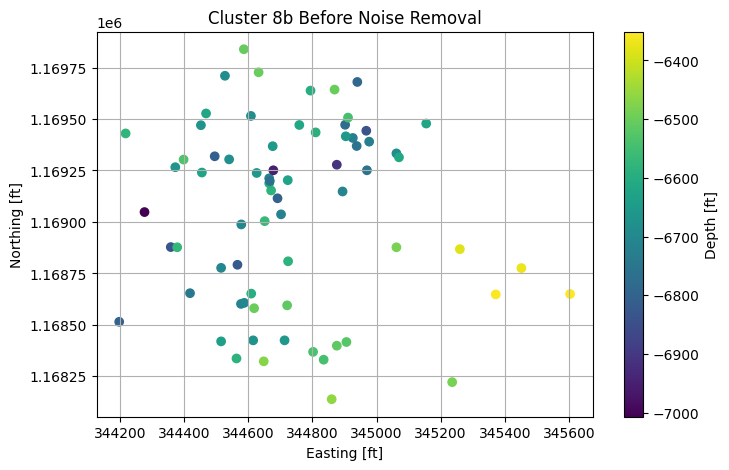

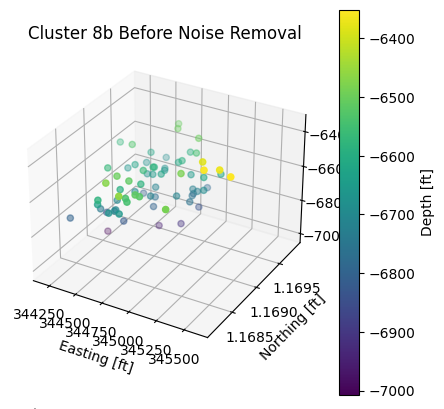

In [53]:
plot_points(cluster_8b, cluster_name='Cluster 8b')

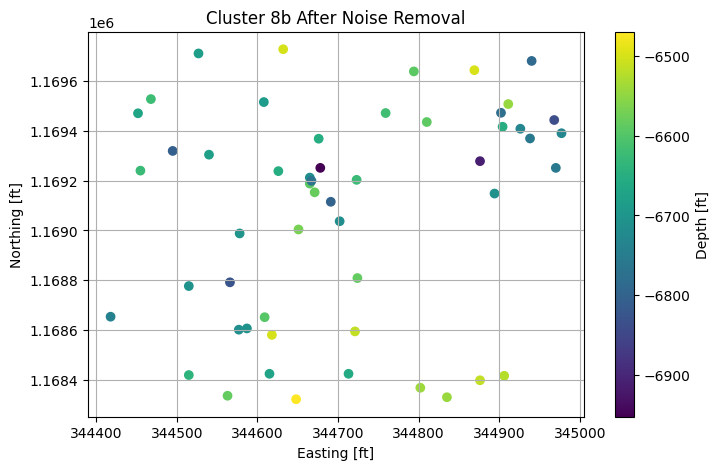

solution: 0.016420 x + -0.075603 y + 76061.756582 = z
relative error: 0.015337866908054837


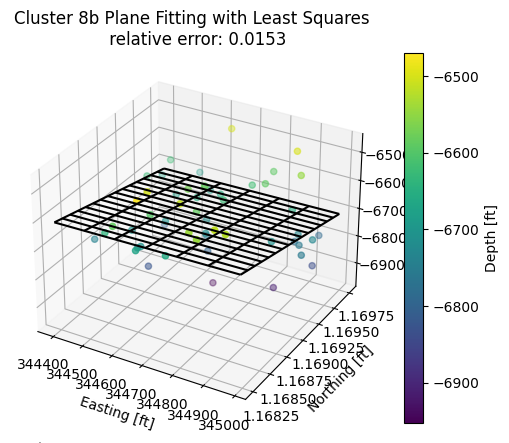

In [81]:
refined_8b = plot_NE_NoNoise(cluster_8b, Emin=344400, Emax=345000, Nmin=1.16825e6, Nmax=1.16975e6, cluster_name='Cluster 8b')

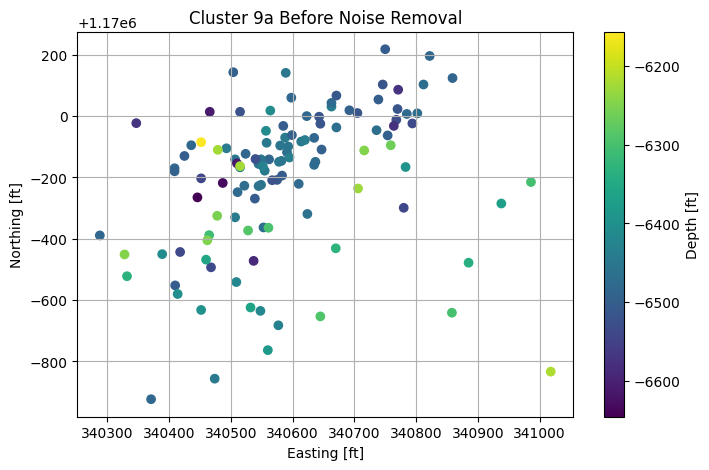

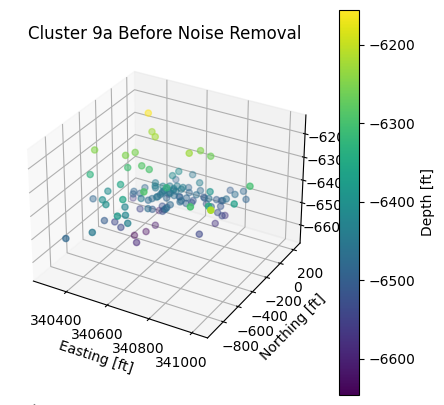

In [59]:
plot_points(cluster_9a, cluster_name='Cluster 9a')

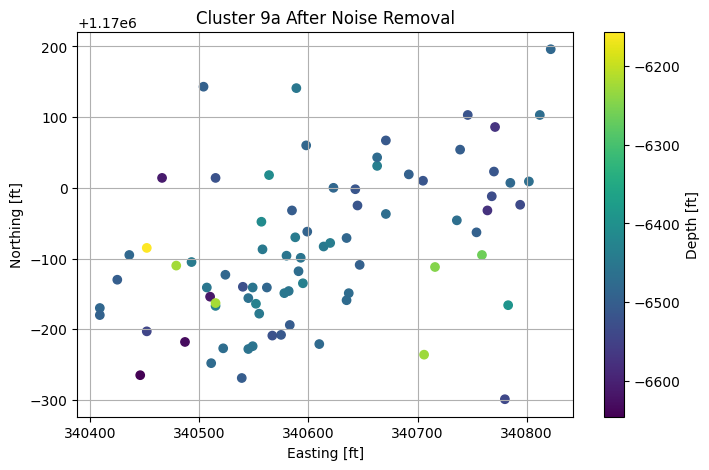

solution: 0.026456 x + -0.082317 y + 80822.784546 = z
relative error: 0.012964542060651212


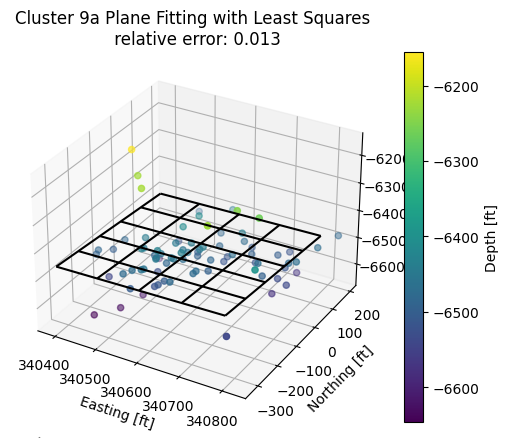

In [82]:
refined_9a = plot_NE_NoNoise(cluster_9a, Emin=340400, Emax=340850, Nmin=-300+1.17e6, Nmax=210+1.17e6, cluster_name='Cluster 9a')

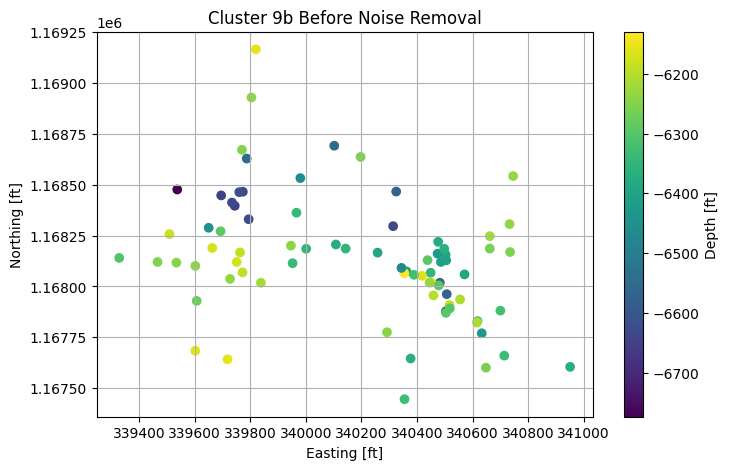

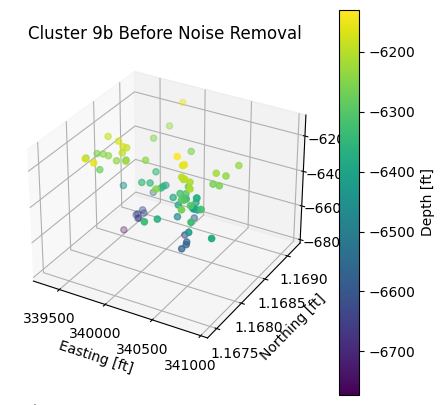

In [86]:
plot_points(cluster_9b, cluster_name='Cluster 9b')

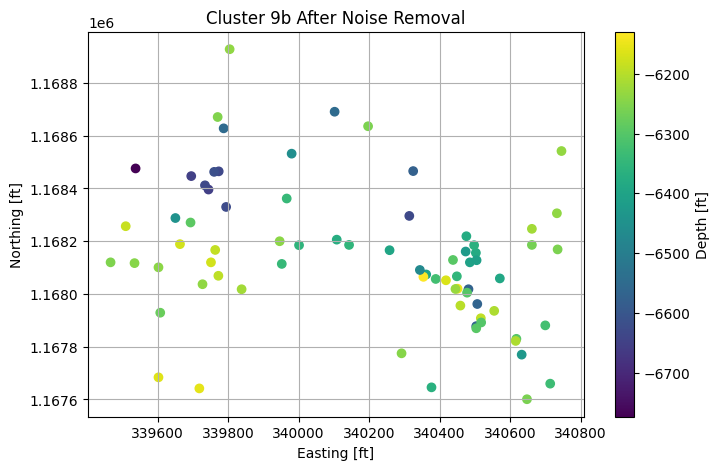

solution: -0.012532 x + -0.223644 y + 259164.052079 = z
relative error: 0.02212845527546002


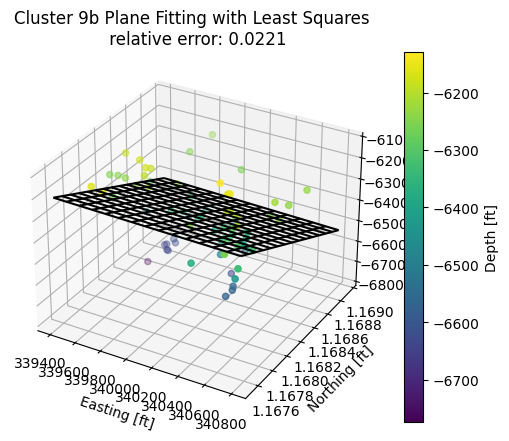

In [87]:
refined_9b = plot_NE_NoNoise(cluster_9b, Emin=cluster_9b[:, 1].min(), Emax=cluster_9b[:, 1].max(), Nmin=cluster_9b[:, 0].min(), Nmax=cluster_9b[:, 0].max(), cluster_name='Cluster 9b')

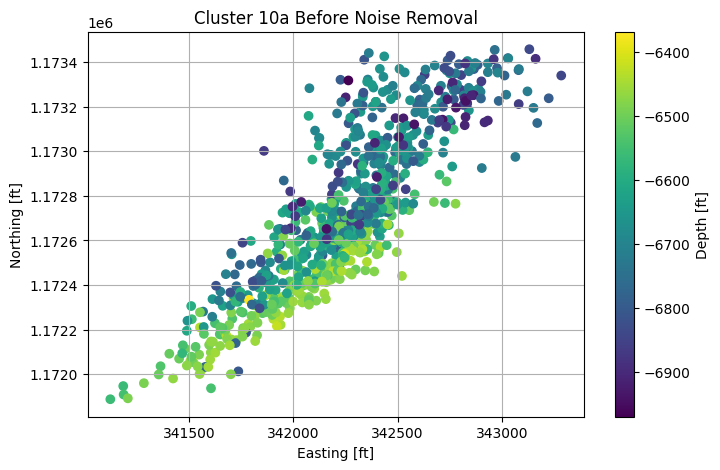

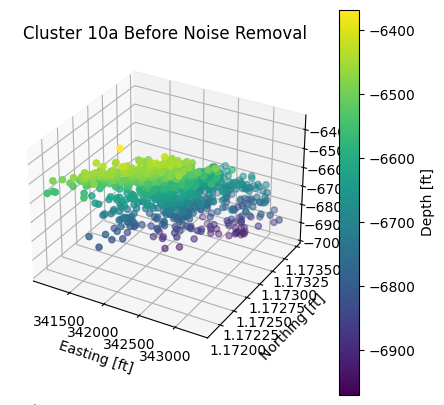

In [84]:
plot_points(cluster_10a, cluster_name='Cluster 10a')

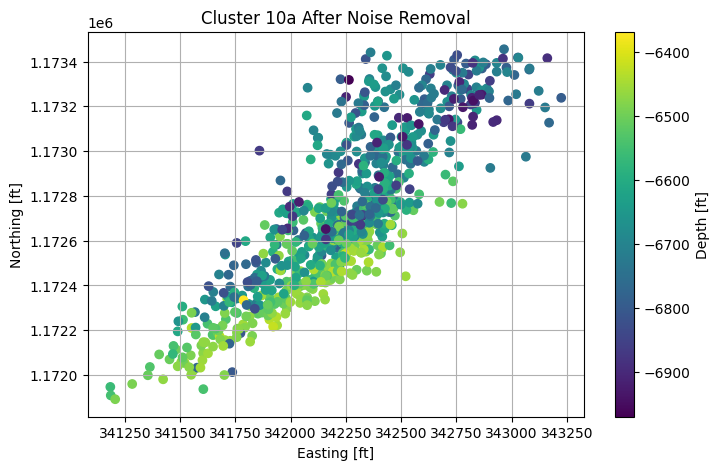

solution: 0.124057 x + -0.321774 y + 328257.920846 = z
relative error: 0.014608497583657802


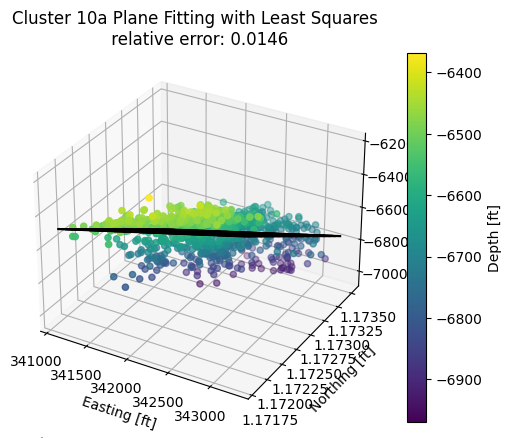

In [85]:
refined_10a = plot_NE_NoNoise(cluster_10a, Emin=cluster_10a[:, 1].min(), Emax=cluster_10a[:, 1].max(), Nmin=cluster_10a[:, 0].min(), Nmax=cluster_10a[:, 0].max(), cluster_name='Cluster 10a')

solution: -0.126291 x + -0.398838 y + 505176.443076 = z
residual: 2113.999141987896
R2:  0.0649254454025906


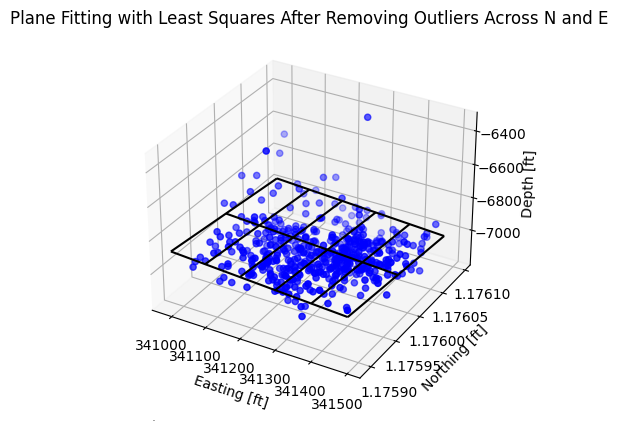

In [ ]:
xs = data2[:,1]
ys = data2[:,0]
zs = data2[:,2]

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
scatter = ax.scatter(xs, ys, zs, c = zs, cmap = 'viridis')
plt.colorbar(scatter, label='Depth [ft]')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.array(tmp_b).T
A = np.array(tmp_A)

# Manual solution
fit = np.linalg.inv(A.T @ A) @ A.T @ b
errors = b - A @ fit
residual = np.linalg.norm(errors)

print("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
# print("errors: \n", errors)
print("residual:", residual)
print("R2: ", r2_score(b, A@fit))

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1], 100),
                  np.arange(ylim[0], ylim[1], 100))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('Easting [ft]')
ax.set_ylabel('Northing [ft]')
ax.set_zlabel('Depth [ft]')
plt.title('Plane Fitting with Least Squares After Removing Outliers Across N and E')
plt.show()

In [ ]:
# Define scatter plot for 3D points
scatter_points = go.Scatter3d(
    x=xs,
    y=ys,
    z=zs,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Points'
)

# Define surface plot for median plane
surface_plane = go.Surface(
    x=X,
    y=Y,
    z=Z,
    colorscale='RdBu',
    opacity=0.5,
    name='Median Plane'
)

# # Define normal vector arrow
# arrow_normal = go.Scatter3d(
#     x=[centroid[0], centroid[0] + normal[0]],
#     y=[centroid[1], centroid[1] + normal[1]],
#     z=[centroid[2], centroid[2] + normal[2]],
#     mode='lines',
#     line=dict(color='green', width=5),
#     name='Normal Vector'
# )


# Define normal vector arrow
arrow_normal = go.Cone(
    x=[centroid[0]],
    y=[centroid[1]],
    z=[centroid[2]],
    u=[normal[0]],
    v=[normal[1]],
    w=[normal[2]],
    sizemode='absolute',
    sizeref=500,
    showscale=False,
    colorscale=[[0, 'green'], [1, 'green']],
    anchor='tail',
    name='Normal Vector'
)





# Create plot layout
layout = go.Layout(
    scene=dict(
        aspectratio=dict(x=2, y=2, z=1),  # Adjust aspect ratio
        xaxis=dict(title='Easting [ft]'),
        yaxis=dict(title='Northing [ft]'),
        zaxis=dict(title='Depth [ft]')
    )
)

# Create plot
fig = go.Figure(data=[scatter_points, surface_plane], layout=layout)
fig.update_layout(title_text="Cluster 3a Subcluster Fault Plane")

# Show plot
fig.show(renderer="colab")
py.iplot(fig, filename='Cluster_3') ## Uncomment to save HTML plot